In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ## better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [326]:
#load dataframe and remove "Unnamed" column

cs_df = pd.read_csv('Data copy/Data_Marketing_Customer_Analysis_Round2.csv')
cs_df.drop(cs_df.filter(regex="Unname"),axis=1, inplace=True)

In [327]:
# replace missing values for "Income" column with 0

cs_df["Income"].replace(0, np.nan, inplace=True)

In [328]:
# drop missing values from entire dataframe

cs_df.dropna(inplace = True)

In [331]:
cs_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,34.0,31,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,10.0,3,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730.0,...,13.0,31,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334.0,...,25.0,25,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717.0,...,26.0,10,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10897,MM70762,Arizona,9075.768214,Yes,Basic,Master,1/26/11,Employed,M,37722.0,...,8.0,23,Personal Auto,Personal L1,Offer1,Agent,158.077504,Sports Car,Medsize,A
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304.0,...,10.0,30,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855.0,...,30.0,82,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146.0,...,7.0,68,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


# Activity 7

## Linear Regression

- Train-test split.
- Standardize the data (after the data split).
- Apply linear regression.
- Model Interpretation.
- Model Validation

## Model Evaluation:
- MSE.
- RMSE.
- MAE.


1. split x/y
2. x: devide categorical/numerical
- categorical: encode
- x: concatination categorical/numerical
- split data x_train/x_test
- x_train: devide categorical_x_train/numerical_x_train
- x_test: devide categorical_x_test/numerical_x_test
- x_train/x_test numericals:
- standardize x_train (x_train use fit --> then apply it for x_train and x_test)
- quantiletransformer (x_train use fit --> then apply it for x_train and x_test) -->Income, CLV,...
- x_train: concatination categorical_x_train:/numerical_x_train
- x_test: concatination categorical_x_test/numerical_x_test


## für heute:

1. split x/y
2. split data x_train/x_test
- x_train/x_test numericals:
- standardize x_train (x_train use fit --> then apply it for x_train and x_test)
- quantiletransformer (x_train use fit --> then apply it for x_train and x_test) -->Income, CLV,...
- modelling

## X/Y Split

In [332]:
# X/Y Split target variable: 'Total Claim Amount'

X=cs_df.drop('Total Claim Amount', axis=1)
y=cs_df['Total Claim Amount']

In [333]:
X=X._get_numeric_data()


In [334]:
#train/test split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [335]:
#standardize x_train

std_scaler=StandardScaler().fit(X_train)   # finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [336]:
#standardize x_test

X_test_scaled=std_scaler.transform(X_test)

In [337]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.76577618 -0.4586684  -0.74210409 -0.30139306 -1.3770911 ]
 [ 1.82157789 -1.24219276  2.70558885  1.874389    0.231867  ]
 [-0.46018933  1.17730914 -0.94321951 -0.00469551 -1.59161885]
 ...
 [ 0.73683279 -1.26466955 -0.68464254  1.28099389 -1.34133647]
 [-0.4377742   0.81842967 -0.85702719  0.29200204  1.16148723]
 [-0.77469205  0.09617539 -0.77083487  0.78649797  1.44752422]]
--------
[[ 0.03305492 -1.01788269 -0.56971944 -1.19148572  0.55365861]
 [ 0.06172422  1.38750877 -0.56971944  0.68759878  1.66205197]
 [ 2.70072995 -0.69534071 -0.13875783  1.67659063  0.41064012]
 ...
 [-0.27632307 -1.3292279  -0.22495015  0.5886996   1.01846873]
 [-0.81866112 -1.01259648 -0.91448874 -1.38928409  1.59054272]
 [ 0.61725022 -0.40131096  0.32093456 -1.19148572  0.30337624]]


/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

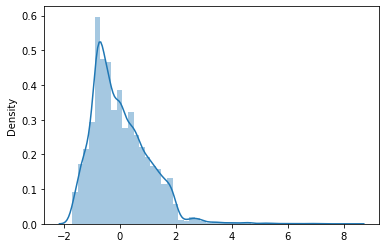

In [338]:
#Quantile Transformer "X_train_scaled"

qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled)
X_train_transformed=qt.transform(X_train_scaled)
sns.distplot(X_train_scaled)

# Apply Linear Regression

In [339]:
X.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception'],
      dtype='object')

## Modeling using Statsmodels

In [340]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_train_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     406.8
Date:                Tue, 01 Feb 2022   Prob (F-statistic):          4.71e-315
Time:                        17:43:00   Log-Likelihood:                -15702.
No. Observations:                2359   AIC:                         3.142e+04
Df Residuals:                    2353   BIC:                         3.145e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        378.1745      3.879     97.500      0.0

In [341]:
predictions_test

array([294.12205185, 874.23928775, 167.24714945, ..., 328.5537875 ,
       184.27070188, 236.25929155])

In [342]:
#display adjusted R-squared

print(model.rsquared_adj)

0.46251627112279436


## Modeling using Scikit Learn
### Model fitting

In [343]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

### model parameters ( b1,b2,b3,b4)

In [344]:
model.coef_

array([ -6.56693413, -55.39666777, 167.08128395,  -6.16333696,
        -5.55098563])

In [345]:
model.intercept_

378.1744533047902

In [346]:
y_pred=model.predict(X_test_scaled)   

In [347]:
y_test

1985     523.888845
6377     355.200000
10676    395.729716
8800     321.600000
1841     394.968488
            ...    
768      355.200000
9937     199.281404
3390     412.800000
6984     297.600000
8086     504.000000
Name: Total Claim Amount, Length: 1011, dtype: float64

In [348]:
y_pred

array([343.42541381, 192.25236606, 363.16180969, ..., 406.7570257 ,
       286.58461158, 455.6339516 ])

In [349]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

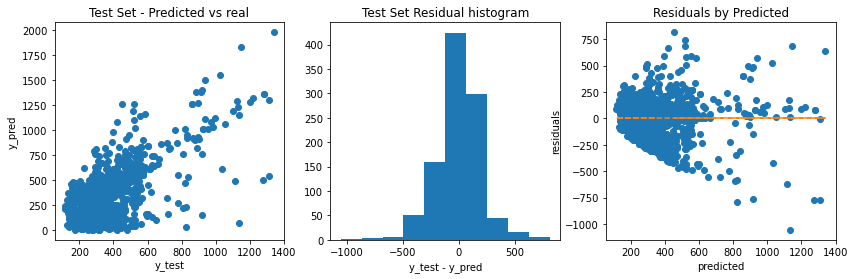

In [350]:
# Make a scatter plot y_pred vs y_test
# What kind of plot will you get if all the all the predictions are ok?
# A straight line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals i.e.: y_test - y_pred  [Homoscedasticity]
# Does it resemble a normal distribution?

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_test - y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

### Error Metrics

In [351]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

38232.67526755342
139.7490694890582


In [352]:
R2=r2_score(y_test,y_pred)
R2

0.43848016806174717

In [353]:
X_test.shape[1]

5

In [354]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.43568653705707927

### Feature Importance

In [355]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [356]:
features_importances

,Attribute,Importance
2,Monthly Premium Auto,167.081284
1,Income,55.396668
0,Customer Lifetime Value,6.566934
3,Months Since Last Claim,6.163337
4,Months Since Policy Inception,5.550986


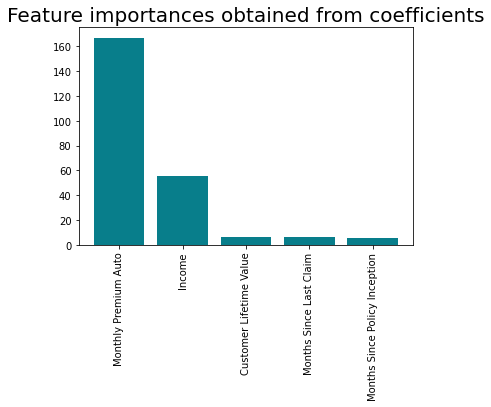

In [357]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Evaluating predictions

In [358]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

139.74906948905823

In [359]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

38232.67526755346

In [360]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

195.53177559556264